In [2]:
import os
import subprocess
import sys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def define_pjpf( row ):
        if row['FIRST_NAME'] == 'PJ':
                return 'PJ'
        else:
                return 'PF'

In [4]:
resultados = pd.read_csv("resultados.csv")

In [5]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
TYPE              17 non-null object
TITLE             17 non-null object
SUBJECT           17 non-null object
DESCRIPTION       17 non-null object
RESULT            17 non-null object
ID_PROPOSITION    17 non-null int64
dtypes: int64(1), object(5)
memory usage: 888.0+ bytes


In [6]:
appr = resultados[resultados.RESULT == 'APPROVED']

In [7]:
defeat = resultados[resultados.RESULT == 'DEFEATED']

In [8]:
appr.head(15)

,TYPE,TITLE,SUBJECT,DESCRIPTION,RESULT,ID_PROPOSITION
0,CISS,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,Education,$9 billion in bonds for education and schools,APPROVED,51
1,CICA/SS,PROPOSITION 052 - STATE FEES ON HOSPITALS. FED...,Healthcare,Voter approval of changes to the hospital fee ...,APPROVED,52
3,CICA/SS,PROPOSITION 054 - LEGISLATURE. LEGISLATION AND...,Accountability,Conditions under which legislative bills can b...,APPROVED,54
4,CICA,PROPOSITION 055 - TAX EXTENSION TO FUND EDUCAT...,Taxes,Extension of personal income tax on incomes ov...,APPROVED,55
5,CICA,PROPOSITION 056 - CIGARETTE TAX TO FUND HEALTH...,Tobacco,Increase the cigarette tax by $2.00 per pack,APPROVED,56
6,CICA/SS,PROPOSITION 057 - CRIMINAL SENTENCES. JUVENILE...,Trials,Felons convicted of non-violent crimes and juv...,APPROVED,57
7,LRSS,"PROPOSITION 058 - SB 1174 (CHAPTER 753, STATUT...",Education,Education Bilingual education in public schools,APPROVED,58
8,AQ,"PROPOSITION 059- SB 254 (CHAPTER 20, STATUTES ...",Campaign finance,State's position on Citizens United v. Federal...,APPROVED,59
12,CISS,PROPOSITION 063- FIREARMS. AMMUNITION SALES. I...,Firearms,Background checks for ammunition purchases,APPROVED,63
13,CISS,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,Marijuana,Legalization of marijuana and hemp,APPROVED,64


In [9]:
defeat.head(10)

,TYPE,TITLE,SUBJECT,DESCRIPTION,RESULT,ID_PROPOSITION
2,CICA,PROPOSITION 053 - REVENUE BONDS. STATEWIDE VOT...,Elections/Bonds,Projects that cost more than $2 billion,DEFEATED,53
9,CISS,PROPOSITION 060- ADULT FILMS. CONDOMS. HEALTH ...,Movies,Require the use of condoms in pornographic films,DEFEATED,60
10,CISS,PROPOSITION 061- STATE PRESCRIPTION DRUG PURCH...,Healthcare,Prescription drug price regulations,DEFEATED,61
11,CISS,PROPOSITION 062- DEATH PENALTY. INITIATIVE STA...,Death penalty,Repeal the death penalty,DEFEATED,62
14,CISS,PROPOSITION 065- CARRY-OUT BAGS. CHARGES. INIT...,Environment,Grocery and retail carry-out bags,DEFEATED,65


In [10]:
resultados.head(5)

,TYPE,TITLE,SUBJECT,DESCRIPTION,RESULT,ID_PROPOSITION
0,CISS,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,Education,$9 billion in bonds for education and schools,APPROVED,51
1,CICA/SS,PROPOSITION 052 - STATE FEES ON HOSPITALS. FED...,Healthcare,Voter approval of changes to the hospital fee ...,APPROVED,52
2,CICA,PROPOSITION 053 - REVENUE BONDS. STATEWIDE VOT...,Elections/Bonds,Projects that cost more than $2 billion,DEFEATED,53
3,CICA/SS,PROPOSITION 054 - LEGISLATURE. LEGISLATION AND...,Accountability,Conditions under which legislative bills can b...,APPROVED,54
4,CICA,PROPOSITION 055 - TAX EXTENSION TO FUND EDUCAT...,Taxes,Extension of personal income tax on incomes ov...,APPROVED,55


In [11]:
pAllProp = pd.read_csv("all_prop.csv")

In [12]:
pAllProp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86786 entries, 0 to 86785
Data columns (total 15 columns):
FILING_ID             86786 non-null int64
COMMITTEE_ID          86786 non-null int64
COMMITTEE_NAME        86786 non-null object
COMMITTEE_POSITION    86786 non-null object
AMEND_ID              86786 non-null int64
FIRST_NAME            83652 non-null object
LAST_NAME             86786 non-null object
CITY                  86773 non-null object
STATE                 86766 non-null object
ZIPCODE               86770 non-null object
EMPLOYER              80993 non-null object
OCCUPATION            83576 non-null object
DATE                  86786 non-null object
AMOUNT                86786 non-null float64
ID_PROPOSITION        86786 non-null int64
dtypes: float64(1), int64(4), object(10)
memory usage: 9.9+ MB


In [13]:
pAllProp.head(3)

,FILING_ID,COMMITTEE_ID,COMMITTEE_NAME,COMMITTEE_POSITION,AMEND_ID,FIRST_NAME,LAST_NAME,CITY,STATE,ZIPCODE,EMPLOYER,OCCUPATION,DATE,AMOUNT,ID_PROPOSITION
0,1680654,1220380,Community College Facility Coalition Issues Co...,SUPPORT,0,NaN,COMMUNITY COLLEGE FACILITY COALITION,SACRAMENTO,CA,95814,NaN,NaN,4/13/2012 12:00:00 AM,75000.0,51
1,2012862,1220380,Community College Facility Coalition Issues Co...,SUPPORT,0,NaN,"DOVETAIL DECISION CONSULTANTS, INC.",San Anselmo,CA,94960,NaN,NaN,12/17/2015 12:00:00 AM,100.0,51
2,2012862,1220380,Community College Facility Coalition Issues Co...,SUPPORT,0,ERIC,MITTLESTEAD,Exeter,CA,93221,KERN COUNTY COLLEGE DISTRICT,COLLEGE ADMINISTRATOR,12/17/2015 12:00:00 AM,250.0,51


In [14]:
resTotAllProp = pd.merge(left=resultados, right=pAllProp, left_on='ID_PROPOSITION', right_on='ID_PROPOSITION')

In [15]:
groupbyID_PROPOSITION = resTotAllProp.groupby('ID_PROPOSITION').apply(lambda x: len(x))

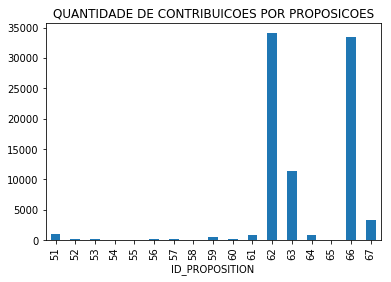

In [16]:
groupbyID_PROPOSITION.plot(kind='bar', grid=False, title="QUANTIDADE DE CONTRIBUICOES POR PROPOSICOES")

In [17]:
groupbyRESULT = resTotAllProp.groupby('RESULT').apply(lambda x: len(x))

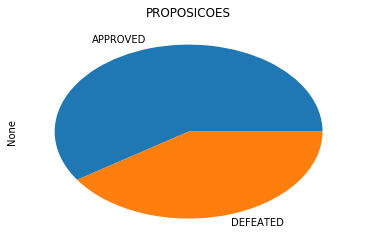

In [18]:
groupbyRESULT.plot(kind='pie', grid=False, title="PROPOSICOES")

In [19]:
groupbyPROPAMOUNT = resTotAllProp.groupby(['AMOUNT']).ID_PROPOSITION.value_counts()

In [20]:
groupbyPROPAMOUNT.head(5)

AMOUNT      ID_PROPOSITION
-8478390.0  52                1
-150000.0   64                1
-27000.0    51                1
-15000.0    63                1
-9000.0     51                1
Name: ID_PROPOSITION, dtype: int64

In [21]:
groupbyPROPAMOUNT.unstack()

ID_PROPOSITION,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
AMOUNT,,,,,,,,,,,,,,,,,
-8478390.00,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-150000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
-27000.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-15000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
-9000.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
-2500.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
-2450.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
-1000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87024bcb50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f870152f710>]], dtype=object)

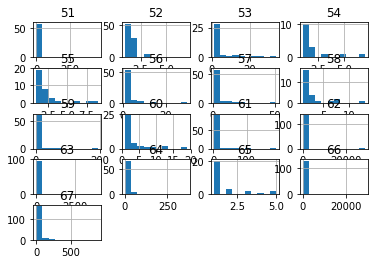

In [22]:
groupbyPROPAMOUNT.unstack().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87013ecc10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8700679550>]], dtype=object)

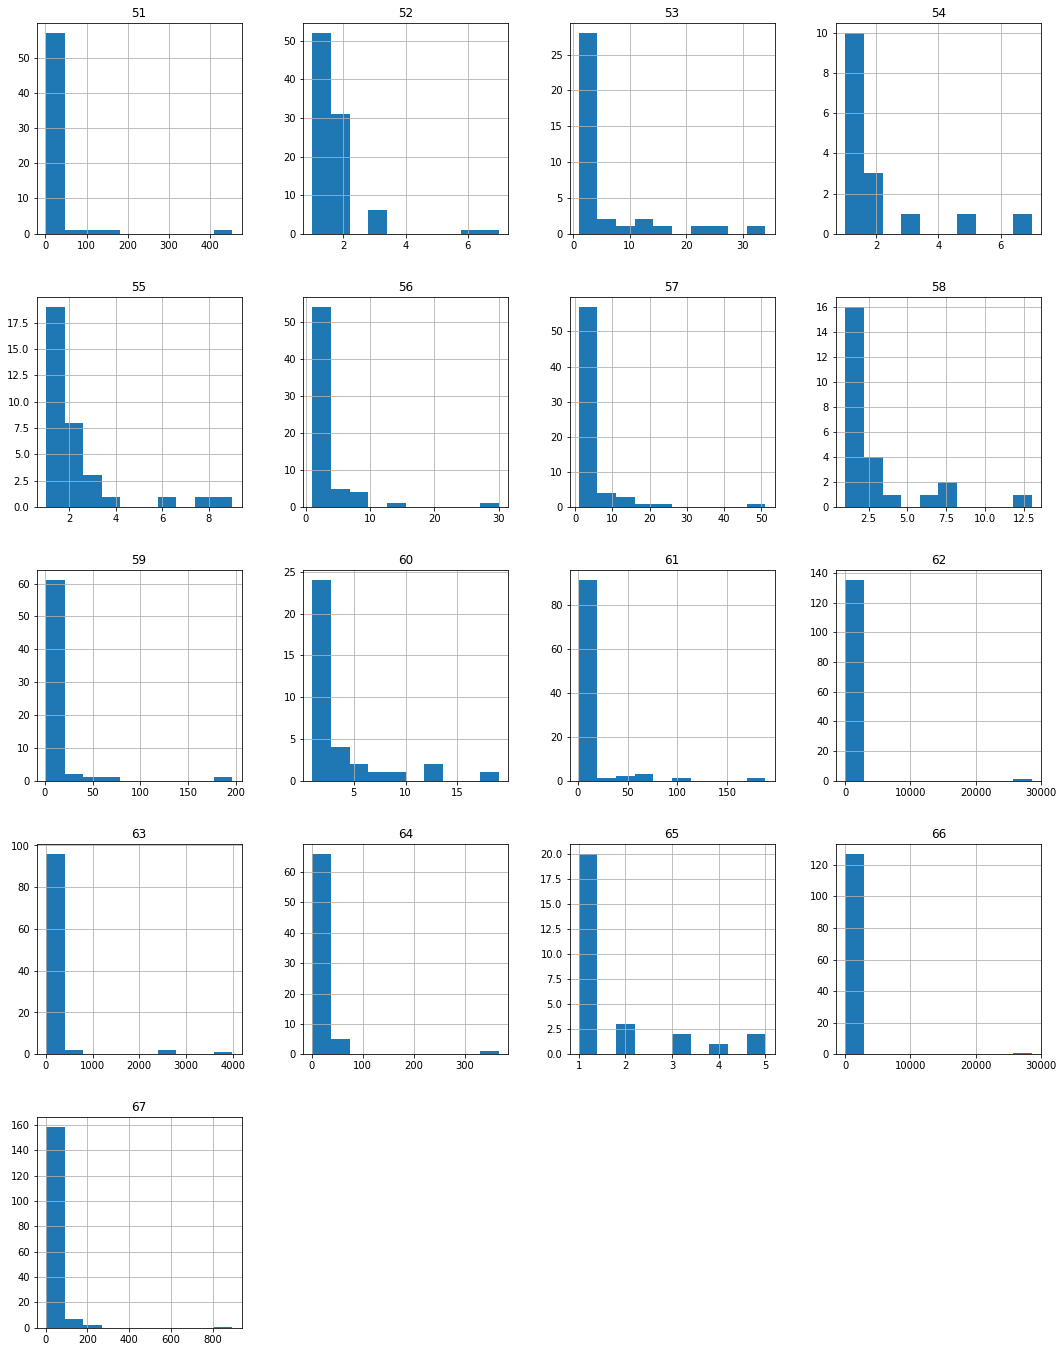

In [23]:
groupbyPROPAMOUNT.unstack().hist(figsize=(18,24))

In [24]:
resTotAllProp.drop(['FILING_ID','TYPE','TITLE','SUBJECT', 'DESCRIPTION', 'COMMITTEE_ID', 'AMEND_ID', 'CITY', 'STATE', 'ZIPCODE', 'EMPLOYER', 'OCCUPATION', 'DATE'], axis=1, inplace=True)

In [25]:
resTotAllProp['FIRST_NAME'].fillna('PJ', inplace=True)

In [26]:
resTotAllProp['WHO'] = resTotAllProp.apply( lambda row: define_pjpf( row ), axis=1)

In [27]:
resTotAllProp.drop(['FIRST_NAME','LAST_NAME','COMMITTEE_NAME'], axis=1, inplace=True)

In [28]:
print resTotAllProp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86786 entries, 0 to 86785
Data columns (total 5 columns):
RESULT                86786 non-null object
ID_PROPOSITION        86786 non-null int64
COMMITTEE_POSITION    86786 non-null object
AMOUNT                86786 non-null float64
WHO                   86786 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ MB
None


In [29]:
print resTotAllProp.head(15)

      RESULT  ID_PROPOSITION COMMITTEE_POSITION   AMOUNT WHO
0   APPROVED              51            SUPPORT  75000.0  PJ
1   APPROVED              51            SUPPORT    100.0  PJ
2   APPROVED              51            SUPPORT    250.0  PF
3   APPROVED              51            SUPPORT   5000.0  PJ
4   APPROVED              51            SUPPORT   5000.0  PJ
5   APPROVED              51            SUPPORT   1000.0  PJ
6   APPROVED              51            SUPPORT    500.0  PJ
7   APPROVED              51            SUPPORT   5000.0  PJ
8   APPROVED              51            SUPPORT   5000.0  PJ
9   APPROVED              51            SUPPORT   2500.0  PJ
10  APPROVED              51            SUPPORT   1500.0  PJ
11  APPROVED              51            SUPPORT    500.0  PJ
12  APPROVED              51            SUPPORT   2000.0  PJ
13  APPROVED              51            SUPPORT   1000.0  PJ
14  APPROVED              51            SUPPORT   1000.0  PJ


In [30]:
AllSum = resTotAllProp.groupby(['COMMITTEE_POSITION', 'WHO', 'RESULT'])[["AMOUNT"]].sum().reset_index()

In [31]:
AllQntd = resTotAllProp.groupby(['COMMITTEE_POSITION', 'WHO', 'RESULT']).agg(['count']).reset_index()

In [32]:
ByPropAllSum = resTotAllProp.groupby(['COMMITTEE_POSITION', 'WHO', 'RESULT','ID_PROPOSITION'])[["AMOUNT"]].sum().reset_index()

In [33]:
ByPropAllQntd = resTotAllProp.groupby(['COMMITTEE_POSITION', 'WHO', 'RESULT','ID_PROPOSITION']).agg(['count']).reset_index()

In [34]:
print AllSum

  COMMITTEE_POSITION WHO    RESULT        AMOUNT
0             OPPOSE  PF  APPROVED  1.007718e+07
1             OPPOSE  PF  DEFEATED  1.306227e+07
2             OPPOSE  PJ  APPROVED  7.638551e+07
3             OPPOSE  PJ  DEFEATED  1.324030e+08
4            SUPPORT  PF  APPROVED  4.718351e+07
5            SUPPORT  PF  DEFEATED  1.139205e+07
6            SUPPORT  PJ  APPROVED  1.948609e+08
7            SUPPORT  PJ  DEFEATED  3.884276e+07


In [35]:
print AllQntd

  COMMITTEE_POSITION WHO    RESULT ID_PROPOSITION AMOUNT
                                            count  count
0             OPPOSE  PF  APPROVED          10142  10142
1             OPPOSE  PF  DEFEATED          29026  29026
2             OPPOSE  PJ  APPROVED            365    365
3             OPPOSE  PJ  DEFEATED            660    660
4            SUPPORT  PF  APPROVED          39033  39033
5            SUPPORT  PF  DEFEATED           5449   5449
6            SUPPORT  PJ  APPROVED           1970   1970
7            SUPPORT  PJ  DEFEATED            141    141


#OS CSVs abaixo estao com arquivos -new, pois, já foram gerados previamente

In [36]:
ByPropAllSum.to_csv('SumAll-new.csv')

In [37]:
ByPropAllQntd.to_csv('QntdAll-new.csv')

#Lendo os arquivos CSVs gerados previamente

In [38]:
pdSumAll = pd.read_csv("SumAll.csv")

In [39]:
pdQntdAll = pd.read_csv("QntdAll.csv")

#REMOVENDO A COLUNA 0 ABAIXO, pois, é apenas um contador

In [40]:
pdSumAll.drop(pdSumAll.columns[[0]], axis=1, inplace=True )

In [41]:
pdQntdAll.drop(pdQntdAll.columns[[0]], axis=1, inplace=True )

In [42]:
BinresTotAllProp = pd.merge(left=pdSumAll, right=pdQntdAll, left_on=['ID_PROPOSITION','COMMITTEE_POSITION', 'WHO', 'RESULT' ], right_on=['ID_PROPOSITION', 'COMMITTEE_POSITION', 'WHO', 'RESULT' ] )

In [43]:
BinresTotAllProp = BinresTotAllProp[['COMMITTEE_POSITION','WHO','AMOUNT','QNTD', 'RESULT']]

In [44]:
print BinresTotAllProp

   COMMITTEE_POSITION WHO        AMOUNT   QNTD    RESULT
0              OPPOSE  PF  1.450000e+03      3  APPROVED
1              OPPOSE  PF  1.037480e+05     93  APPROVED
2              OPPOSE  PF  4.519730e+05   5864  APPROVED
3              OPPOSE  PF  1.386980e+06     54  APPROVED
4              OPPOSE  PF  8.133034e+06   4128  APPROVED
5              OPPOSE  PF  3.614500e+06     40  DEFEATED
6              OPPOSE  PF  5.812200e+04     56  DEFEATED
7              OPPOSE  PF  9.389649e+06  28930  DEFEATED
8              OPPOSE  PJ  3.526622e+06      3  APPROVED
9              OPPOSE  PJ  5.468455e+07     43  APPROVED
10             OPPOSE  PJ  1.124433e+06     60  APPROVED
11             OPPOSE  PJ  2.383976e+05    105  APPROVED
12             OPPOSE  PJ  1.107950e+06     40  APPROVED
13             OPPOSE  PJ  9.766136e+06     68  APPROVED
14             OPPOSE  PJ  5.937413e+06     46  APPROVED
15             OPPOSE  PJ  1.768600e+07    148  DEFEATED
16             OPPOSE  PJ  3.19

#"""
#PREPARaCAO DA ARVORE
#"""

In [45]:
enc = LabelEncoder()

In [46]:
label_encoder_CP = enc.fit(BinresTotAllProp.iloc[:, 0])
print "Categorical classes:", label_encoder_CP.classes_

Categorical classes: ['OPPOSE' 'SUPPORT']


In [47]:
integer_classes_CP = label_encoder_CP.transform(label_encoder_CP.classes_)
print "Integer classes:", integer_classes_CP

Integer classes: [0 1]


In [48]:
t_CP = label_encoder_CP.transform(BinresTotAllProp.iloc[:, 0])
BinresTotAllProp.iloc[:, 0] = t_CP

In [49]:
label_encoder_WHO = enc.fit(BinresTotAllProp.iloc[:, 1])
print "Categorical classes:", label_encoder_WHO.classes_

Categorical classes: ['PF' 'PJ']


In [50]:
integer_classes_WHO = label_encoder_WHO.transform(label_encoder_WHO.classes_)
print "Integer classes:", integer_classes_WHO

Integer classes: [0 1]


In [51]:
t_WHO = label_encoder_WHO.transform(BinresTotAllProp.iloc[:, 1])
BinresTotAllProp.iloc[:, 1] = t_WHO

In [52]:
label_encoder_RESULT = enc.fit(BinresTotAllProp.iloc[:, 4])
print "Categorical classes:", label_encoder_RESULT.classes_

Categorical classes: ['APPROVED' 'DEFEATED']


In [53]:
integer_classes_RESULT = label_encoder_RESULT.transform(label_encoder_RESULT.classes_)
print "Integer classes:", integer_classes_RESULT

Integer classes: [0 1]


In [54]:
t_RESULT = label_encoder_RESULT.transform(BinresTotAllProp.iloc[:, 4])
BinresTotAllProp.iloc[:, 4] = t_RESULT

In [55]:
print BinresTotAllProp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 5 columns):
COMMITTEE_POSITION    49 non-null int64
WHO                   49 non-null int64
AMOUNT                49 non-null float64
QNTD                  49 non-null int64
RESULT                49 non-null int64
dtypes: float64(1), int64(4)
memory usage: 2.3 KB
None


In [56]:
print BinresTotAllProp.head(3)

   COMMITTEE_POSITION  WHO     AMOUNT  QNTD  RESULT
0                   0    0    1450.00     3       0
1                   0    0  103748.00    93       0
2                   0    0  451973.01  5864       0


In [57]:
features = BinresTotAllProp.columns.difference( ['RESULT'] )
X = BinresTotAllProp[features].values
y = BinresTotAllProp['RESULT'].values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [59]:
dt = DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=5)
dt.fit(X_train, y_train)
y_predict = dt.predict(X_test)

ACCURACY - PRECISAO

In [60]:
print "PRECISAO"
print accuracy_score(y_test, y_predict) * 100

PRECISAO
76.9230769231


MATRIZ DE CONFUSAO

In [61]:
print "MATRIZ DE CONFUSAO"
print pd.DataFrame( confusion_matrix(y_test, y_predict), columns=['0','1'], index=['0', '1'] )

MATRIZ DE CONFUSAO
   0  1
0  8  1
1  2  2


RELATORIO DA CLASSIFICACAO

In [63]:
print ""
print(classification_report(y_test, y_predict))


             precision    recall  f1-score   support

          0       0.80      0.89      0.84         9
          1       0.67      0.50      0.57         4

avg / total       0.76      0.77      0.76        13



In [64]:
with open("tree-final-new.dot", 'w') as f:
        export_graphviz(dt, out_file=f, feature_names=features)

In [65]:
command = ["dot", "-Tpng", "tree-final-new.dot", "-o", "tree-final-new.png"]

In [66]:
subprocess.check_call(command)

0

In [67]:
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)

In [68]:
get_code(dt, ['AMOUNT','COMMITTEE_POSITION','QNTD','WHO'], X)

if ( AMOUNT <= 3570561.0 ) {
    if ( COMMITTEE_POSITION <= 0.5 ) {
        if ( AMOUNT <= 713524.5 ) {
            if ( QNTD <= 74.5 ) {
                if ( AMOUNT <= 29786.0 ) {
                    return [ 1450.     0.     3.     0.] ( 1 examples )
                }
                else {
                    return [  1.03748000e+05   0.00000000e+00   9.30000000e+01   0.00000000e+00] ( 2 examples )
                }
            }
            else {
                return [ 1450.     0.     3.     0.] ( 2 examples )
            }
        }
        else {
            return [ 1450.     0.     3.     0.] ( 3 examples )
        }
    }
    else {
        return [ 1450.     0.     3.     0.] ( 9 examples )
    }
}
else {
    if ( AMOUNT <= 3783400.0 ) {
        return [  1.03748000e+05   0.00000000e+00   9.30000000e+01   0.00000000e+00] ( 1 examples )
    }
    else {
        if ( QNTD <= 90.0 ) {
            if ( QNTD <= 53.5 ) {
                if ( COMMITTEE_POSITION <= 0.5 ) {
     